# Own DBSCAN without libraries

In [19]:
#Mithun Mistry

In [20]:
#We only need numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
#Below libraries of sklearn are just to VERIFY performance.
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [21]:
#Find neighbor points within the circle of given radius and return them
def range_query(data_point, epsilon, data):
    neighbors = []
    for idx, d in enumerate(data):
        distance = np.linalg.norm(data_point - d)
        if(distance <= epsilon and distance != 0):
            neighbors.append(idx)
    return neighbors

In [22]:
#Cluster points through DBSCAN and return which point belongs to which cluster
def own_dbscan(data, epsilon, minimum_points):
    labels = np.zeros(data.shape[0])
    cluster = 0
    for idx, data_point in enumerate(data):
        if labels[idx] != 0:
            continue #point is already assigned to the cluster
        n = range_query(data_point, epsilon, data)
        if len(n) >= minimum_points:
            cluster += 1
            labels[idx] = cluster
            for i in n:
                if labels[i] != 0:
                    continue
                labels[i] = cluster
                #Include border points also into the cluster
                border_n = range_query(data[i], epsilon, data)
                if(len(border_n) >= minimum_points):
                    n += border_n
    return labels

In [23]:
#Generated some data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [24]:
X #Data to perform DBSCAN

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ..., 
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

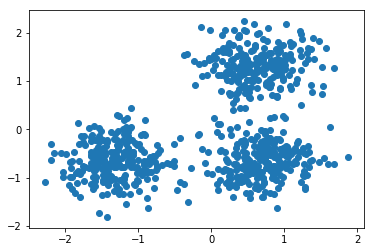

In [25]:
plt.scatter(X[:,0], X[:,1]) #Our original data - unclustered

## Let's perform our own DBSCAN

In [26]:
own_labels = own_dbscan(X,0.3,10)

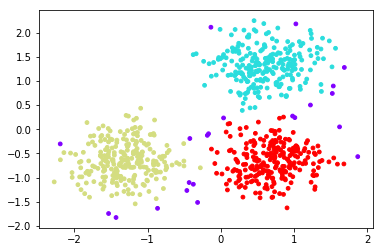

In [27]:
#Let's visualize it
plt.scatter(X[:,0], X[:,1], marker='o', s=14, c=own_labels, cmap='rainbow')

In [28]:
#Here, we can clearly see 3 clusters and purple points are noise and so they don't belong to any cluster

## Verify using Sklearn

In [29]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
sklearn_labels = db.labels_

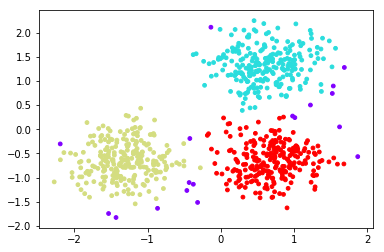

In [30]:
plt.scatter(X[:,0], X[:,1], marker='o', s=14, c=sklearn_labels, cmap='rainbow')

In [31]:
#Verified. As we can see, our own DBSCAN output and Sklearn's output match.
#This is Naive approach. Distances can be calculated only once and then could just be looked up
#by keeping them in matrix. It is dynamic programming and such approach is used in my Heirarchical clustering.
#Will update the code once I implement dynamic programming for DBSCAN also.